# Lets Play Cricket  - IPL Exploration Analysis

Anybody who is a cricket Fan should surely try to analyse this dataset as it would help you in learning with a fun factor. I have tried my best to keep this notebook as simple as possible so that even a beginner can understand it easily. At the same time I have made efforts to analyse the dataset in different aspects effectively. I will keep updating the notebook as and when I come up with new things. Hope you like it!!!

The notebook contains:
 - Basic Analysis like Teams with maximum matches, wins,etc
 - Batsman Analysis
 - Bowler Analysis
 - 200+ scores analysis

If you like the notebook, **Please Upvote** as it will keep me motivated in doing great things ahead. Thanks!!

I have used the following packages for visualisations:

 1. Matplotlib
 2. Seaborn
 3. Plotly

Not all the visuals are interactive as Plotly is not useful everywhere. I have mentioned **INTERACTIVE** at places where the visuals are inteactive.

Following is a **Tableau Dashboard**. DO have a look at it.

## Tableau Dashboard

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [2]:
matches=pd.read_csv('../IPL another practice same data/matches.csv')   
delivery=pd.read_csv('../IPL another practice same data/deliveries.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## Some Cleaning And Transformation

In [4]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [5]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [6]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

## Some Basic Analysis

In [7]:
print('Total Matches Played:',matches.shape[0])


Total Matches Played: 636


In [8]:
print(' \n Venues Played At:',matches['city'].unique())     


 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


In [9]:
print(' \n Teams :',matches['team1'].unique())

 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [10]:
print('\nTotal umpires ',matches['umpire1'].nunique())


Total umpires  44


In [11]:
print('Total venues played at:',matches['city'].nunique())


Total venues played at: 30


In [12]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')

CH Gayle  : has most man of the match awards


In [13]:
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

MI : has the highest number of match wins


In [14]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [15]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


Kolkata Knight Riders(KKR) defeated Gujrat Lions(GL) with the highest wins by wickets

## Toss Decisions

In [16]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


### Toss Decisions across Seasons

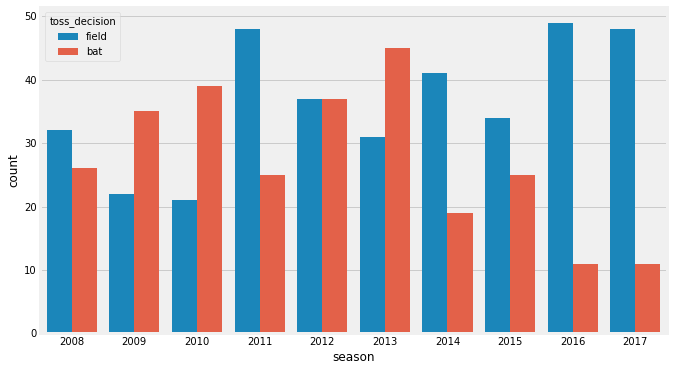

In [17]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2016 though, the majority of toss winners opted for batting. 

### Maximum Toss Winners

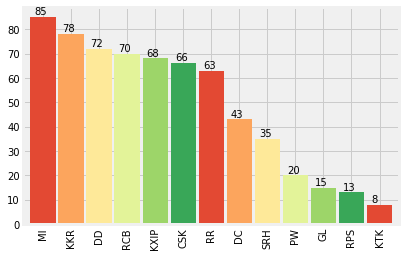

In [18]:
#mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn'))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. Pune Supergiants have the lowest wins as they have played the lowest matches also. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven.

### Total Matches vs Wins for Teams (INTERACTIVE)

### Is Toss Winner Also the Match Winner?

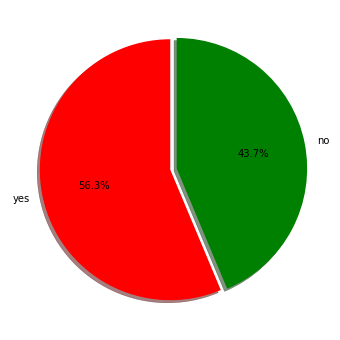

In [19]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winnong team is about 50%-50%

##  Matches played across each season

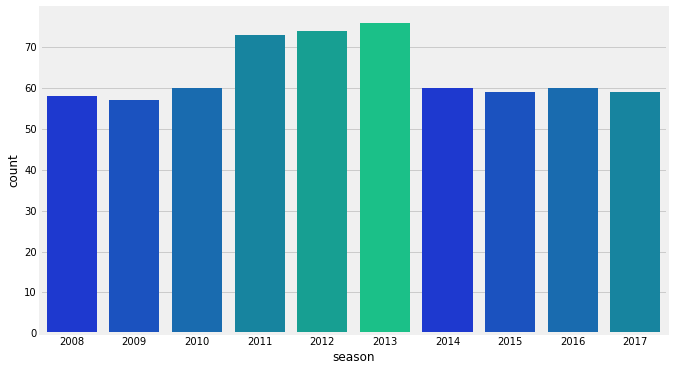

In [20]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

### Runs Across the Seasons

In [21]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left')
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
batsmen.head()

,id,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,0,0,0
1,1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,0,0,0
2,1,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,...,0,0,0,0,4,0,4,0,0,0
3,1,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,0,0,0
4,1,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,...,0,0,0,0,0,2,2,0,0,0


There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season

In [22]:
batsmen.drop('id', axis = 1)
batsmen.head()

,id,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,0,0,0
1,1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,0,0,0
2,1,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,...,0,0,0,0,4,0,4,0,0,0
3,1,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,0,0,0
4,1,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,...,0,0,0,0,0,2,2,0,0,0


### Average runs per match in each Season

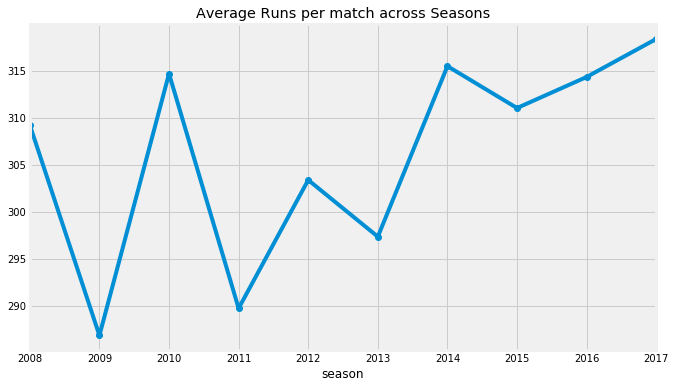

In [21]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

### Sixes and Fours Across the Season

### Runs Per Over By Teams Across Seasons

Maximum runs are being scored in the last 5 overs of the match. MI and RCB have shown a incresing trend in the runs scored throughout the match. 

### Favorite Grounds

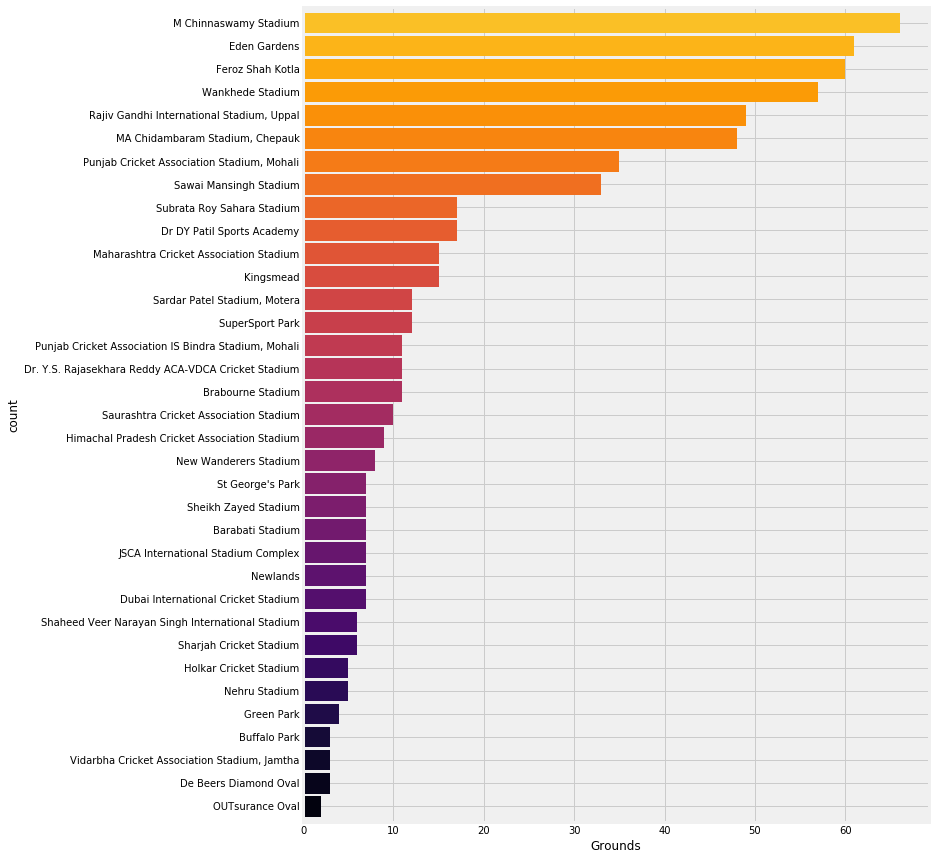

In [23]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

## Maximum Man Of Matches

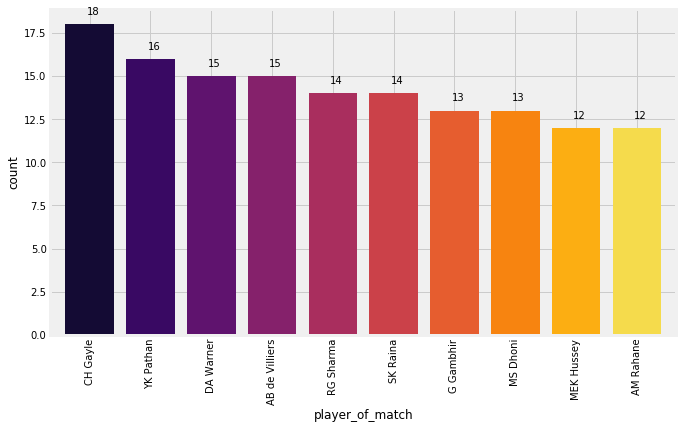

In [24]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.55))
mlt.show()

## Winners by Year

In [25]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)
#getting the last match in every season since the last match will be the final match for the season

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


### Super Over!

In [26]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [27]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['PW', 'KTK', 'RPS', 'DC']


### Favorite Umpires

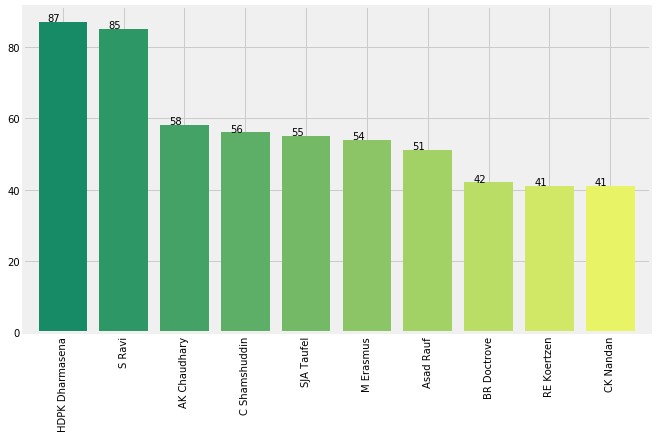

In [28]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

## Team1 vs Team2

Here we will check the matches played between 2 teams and which had won more matches each year

### MI vs KKR

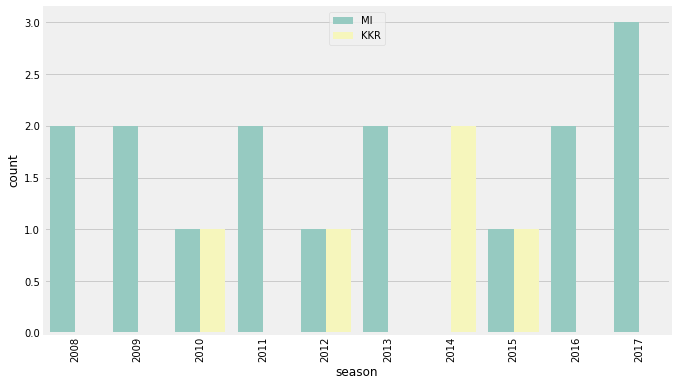

In [29]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('KKR','MI')


MI have defeated KKR in 13 out of 18 matches played between them.Only in the year 2014, KKR won both the matches.Thus in a MI vs KKR match, we know on whom should we bet upon. Similar comparisions can be done between any two teams, we just need to change the team names. 

One thing to notice is that MI and KKR have never played against each other in any qualifiers or finals as both of them have played only 2 matches every year, those being the group stage matches.

### MI vs CSK

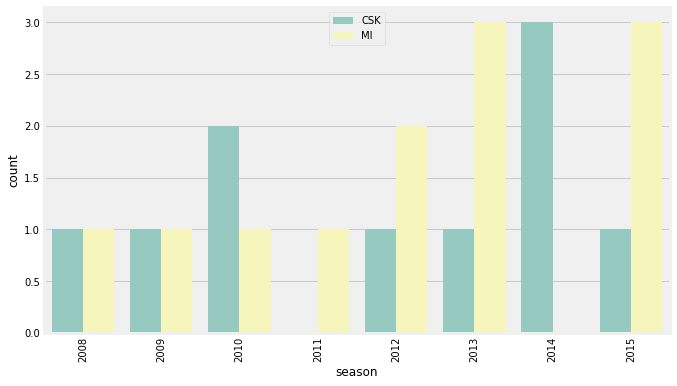

In [30]:
team1_vs_team2('CSK','MI')

Here se can see that MI and CSK have played against each other in more than 2 matches in some seasons i.e they have played qualifiers too.

## Matches Won By A Team Against Other Teams

Now we will be checking the number of times a Team has won against other teams. This will give us an idea as which team has an upper hand over the others when they play head-to-head.

### Score Distribution For Teams by Innings

According to Graph 1 the batting by CSK in innings 1 looks to be the best.  Graph 2 also conveys the same story.

In Graph 2 we see a point near 0 which may seem to be outlier. But it is so because the match was disrupted. 

## 200+ Scores

In [31]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
1498,11338,1,KKR,MI,241
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
1426,11147,1,SRH,RCB,233
596,296,1,KXIP,RCB,232
1500,11339,1,SRH,KXIP,232


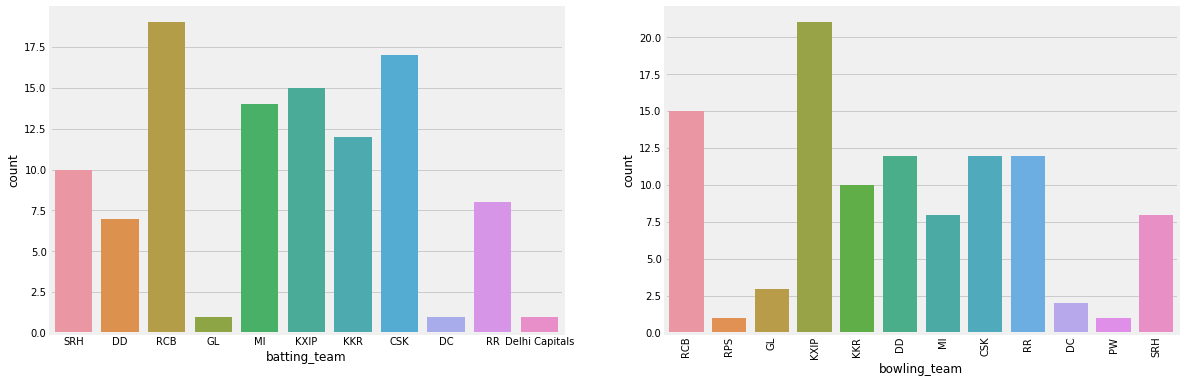

In [32]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs. 

The above dataframe shows the number of times a team has scored above 200 runs against another team. Clearly MI has scored 200+ againt DD 3 times and similarly RCB has scored 200+ againt KXIP 3 times. Also the number of 200+ runs are higher in the 1st innings.

### Chances of chasing 200+ target

It seems to be clear that team batting first and scoring 200+ runs, has a very high probablity of winning the match.

## Batsman Comparator

I have created a function that compares 2 batsman based on their respective stats like runs or strike rate etc. First lets create a dataframe from where we will be taking all that values for comparison.

Now using this dataframe, we can compare stats like the strike rate, or the number of 6's for 4's etc. We will be passing the names of 2 batsmen and two comparing measures for the comparision.

### Dhoni Vs Kohli

## Top Batsmen

### Top 10 Batsman 

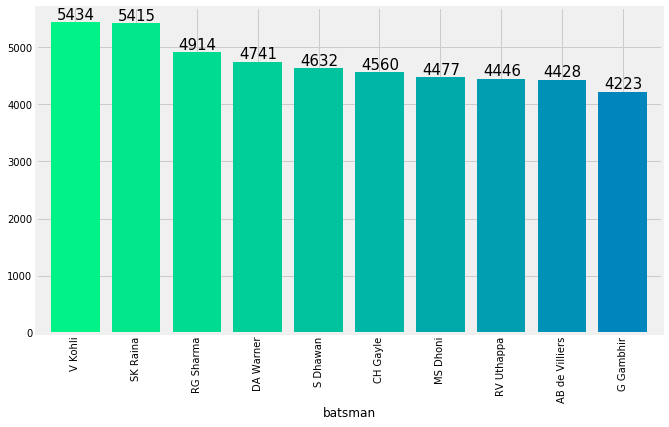

In [34]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

Virat Kohli has highest total runs across all seasons. Raina is just few runs behind with the second spot

### Top Batsman's with 1's, 2's, 3's, 4's 

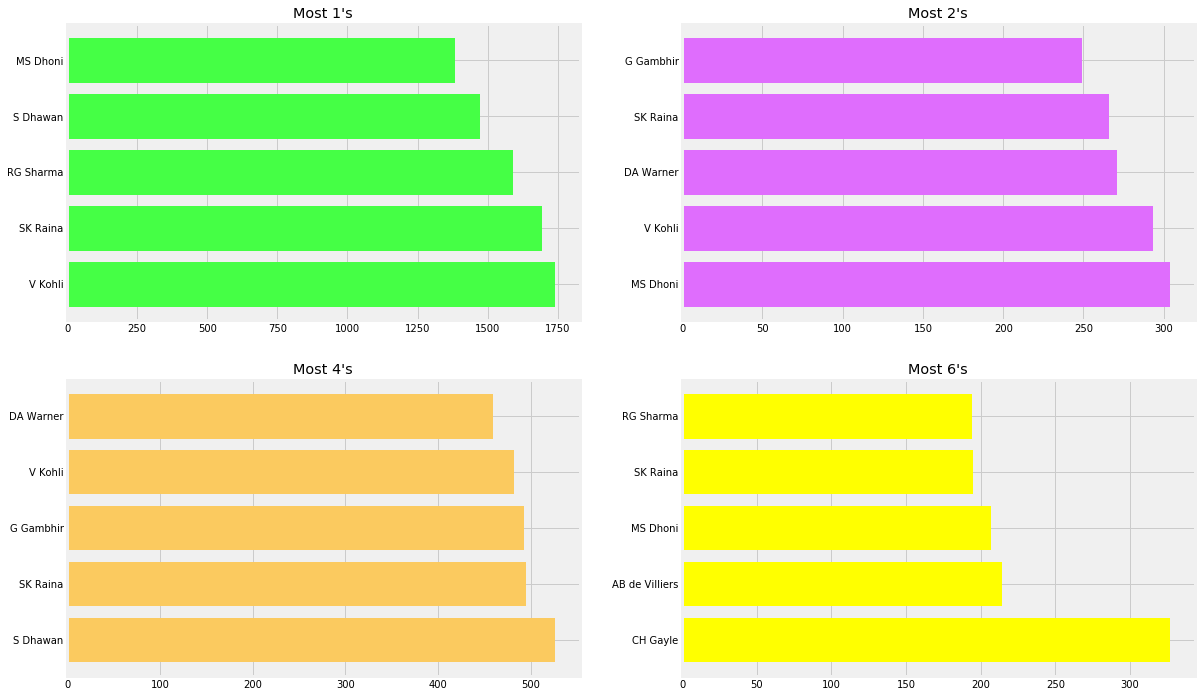

In [35]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

**Observations:**

 1. Kohli has scored the maximum 1's
 2. Dhoni has the maximum 2's . Those Strong Legs :p
 3. Gambhir has the maximum 4's.
 4. C Gayle has the maximum 6's  and he leads by a big margin.

### Top Individual Scores

In [36]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


Here too the Jamaican leads the table. Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

### Individual Scores By Top Batsman each Inning

**Observations:**

 1. **Chris Gayle** has the highest Individual Score of **175** and Highest Number of Centuries i.e **5**
 2. **MS Dhoni** and **Gautam Gambhir** have never scored a Century.
 3. **V Kohli** has played only for 1 IPL Team in all seasons i.e RCB

### Runs Scored By Batsman Across Seasons

David Warner's form looks to be improving season by season. There has been a sharp decline in Kohli's Runs in the last season.

### How do the top batsmen score? (INTERACTIVE)

### Frequency of Scores 

The average score for a batsman is around 19-20. Also the number of single digit score is quite high and the number of centuries is low.

### Orange Caps Each Season(Highest Run Getter per Season) (INTERACTIVE)

## Top Bowlers

### Highest Wicket Taker

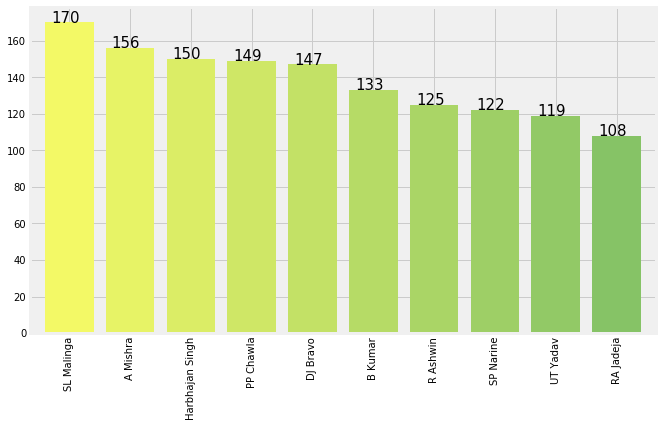

In [37]:
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.show()

Lasith Malinga leads the chart, thanks to his unpredictable bowling action. Other bowlers have a very small wicket margin between them. 